In [218]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

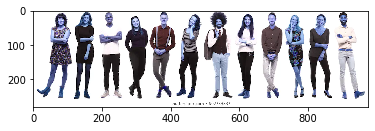

In [230]:
image = cv2.imread('img4.jpg')
plt.imshow(image)

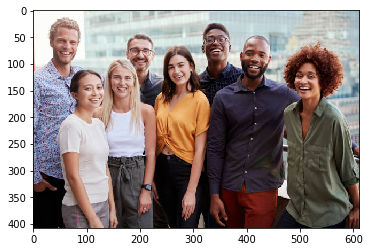

In [10]:
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image1)

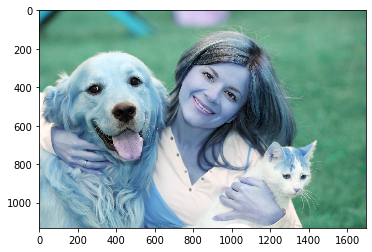

In [64]:
img = cv2.resize(image, None, fx=1, fy=1)
plt.imshow(img)

In [14]:
cv2.imwrite('people1.jpg', img)

True

In [149]:
classes = ['person','bicycle','car','motorbike','aeroplane','bus','train','truck','boat','traffic light','fire hydrant','stop sign','parking meter','bench','bird','cat','dog','horse','sheep','cow','elephant','bear','zebra','giraffe','backpack','umbrella','handbag','tie','suitcase','frisbee','skis','snowboard','sports ball','kite','baseball bat','baseball glove','skateboard','surfboard','tennis racket','bottle','wine glass','cup','fork','knife','spoon','bowl','banana','apple','sandwich','orange','broccoli','carrot','hot dog','pizza','donut','cake','chair','sofa','pottedplant','bed','diningtable','toilet','tvmonitor','laptop','mouse','remote','keyboard','cell phone','microwave','oven','toaster','sink','refrigerator','book','clock','vase','scissors','teddy bear','hair drier','toothbrush']

def load_yolo():
	net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
    
	layers_names = net.getLayerNames()
	output_layers = [layers_names[i[0]-1] for i in net.getUnconnectedOutLayers()]
	colors = np.random.uniform(0, 255, size=(len(classes), 3))
	return net, classes, colors, output_layers

model, classes, colors, output_layers = load_yolo()

In [231]:
img = cv2.resize(image, None, fx=0.5, fy=0.5)
height = img.shape[0]
width = img.shape[1]
channels = img.shape[2]

In [232]:
blob = cv2.dnn.blobFromImage(img, scalefactor=0.00392, size=(320, 320), mean=(0, 0, 0), swapRB=True, crop=False)
model.setInput(blob)
outputs = model.forward(output_layers)


boxes = []
confs = []
class_ids = []
for output in outputs:
    for detect in output:
        scores = detect[5:]
        class_id = np.argmax(scores)
        conf = scores[class_id]
        if conf > 0.3:
            center_x = int(detect[0] * width)
            center_y = int(detect[1] * height)
            w = int(detect[2] * width)
            h = int(detect[3] * height)
            x = int(center_x - w/2)
            y = int(center_y - h / 2)
            print(x)
            boxes.append([x, y, w, h])
            confs.append(float(conf))
            class_ids.append(class_id)

14
38
60
87
132
169
208
436
253
286
327
360
399


In [235]:
import playsound

class_name = []
class_id_count= []
class_count = []

import time
indexes = cv2.dnn.NMSBoxes(boxes, confs, 0.5, 0.4)

img1 = np.copy(img)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    img1 = np.copy(img)
    start_time = time.time()
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    class_count.append(class_ids[i])
    if class_ids[i] not in class_id_count:
        class_id_count.append(class_ids[i])
        class_name.append(str(classes[class_ids[i]]))

    color = colors[i]
    cv2.rectangle(img1, (x,y), (x+w, y+h), color, 2)
    playsound.playsound('beep6.mp3')
    cv2.putText(img1, label, (x, y - 5), font, 1, color, 1)
    cv2.imshow("Image", img1)
    while True:
        key = cv2.waitKey(1)
        end_time = time.time()
        time_diff = end_time - start_time
        if key == 27 or time_diff >= 0.7:
            break

cv2.destroyAllWindows()
        


In [224]:
print(class_name)

['person']


In [234]:
print('This image has ')
for i in range(len(class_id_count)):
    print(str(class_count.count(class_id_count[i]) -1 ) + ' ' + class_name[i])

This image has 
12 person


In [227]:
import playsound

import time
indexes = cv2.dnn.NMSBoxes(boxes, confs, 0.5, 0.4)

img1 = np.copy(img)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    img1 = np.copy(img)
    start_time = time.time()
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    color = colors[i]
    x1 = np.int((x+w)/2)
    y1 = np.int((y+h)/2)
    print(x)
    print(y)
    print(w)
    print(h)
    print(x1)
    print(y1)
    print(' ')
    
    cv2.circle(img1, (x1,y1), 60, color, 2)
    playsound.playsound('beep.mp3')
    cv2.putText(img1, label, (x, y - 5), font, 1, color, 1)
    cv2.imshow("Image", img1)
    while True:
        key = cv2.waitKey(1)
        end_time = time.time()
        time_diff = end_time - start_time
        if key == 27 or time_diff >= 0.2:
            break

cv2.destroyAllWindows()
        
    

2
2
209
276
105
139
 
275
37
205
237
240
137
 
74
90
290
188
182
139
 
167
0
68
104
117
52
 
244
0
66
123
155
61
 
412
17
76
231
244
124
 


In [121]:
x1 = ((x-w)/2)
y1 = ((y-h)/2)

print(x)
print(y)
print(w)
print(h)
print(x1)
print(y1)

246
39
18
24
114.0
7.5
